# Regresión de Lasso

Bajo la regresión lineal común obtenemos:

Ŷ = β0+β1X1+β2X2+β3X3

Se define la función de pérdida como:

L = ∑( Ŷi– Yi)^2 

Para enfrentar el problema de overfit se le agregó un componente de regularización, a esta nueva forma de regresión se le llamó Lassso. Cuando se usa Lasso la función de pérdida se convierte en:

L = ∑( Ŷi– Yi)2 + λ∑ |β|

Al minimizar esto no solo se castigan valores altos de β, también aquellos valores que no son reelevantes se convierten en 0. Lo que ayuda a hacer un tipo de selección de variables. El termino lamda se puede seleccionar por medio de varios métodos, entre ellos validación cruzada.

In [1]:
from sys import version as py_version
from scipy import __version__ as sp_version
from numpy import __version__ as np_version
from pandas import __version__ as pd_version
from matplotlib import __version__ as mplib_version
from sklearn import __version__ as skl_version

In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot
from pandas.tools.plotting import scatter_matrix
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [3]:
# Cargar datos
filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
dataset = pd.read_csv(filename, delim_whitespace=True, names=names)
boston = load_boston()
dataset = pd.DataFrame(data=np.c_[boston['data'], boston['target']], columns=names )

In [4]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


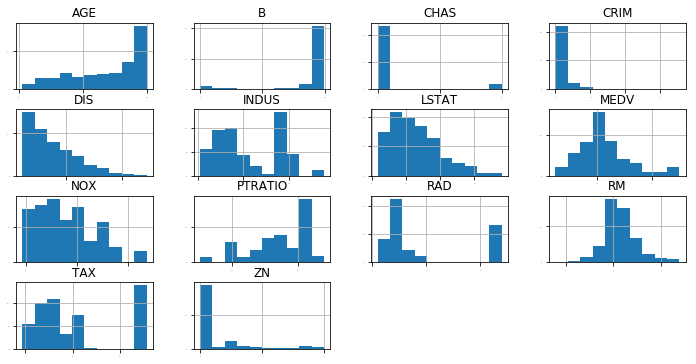

In [5]:
# histogramas
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,6))
pyplot.show()

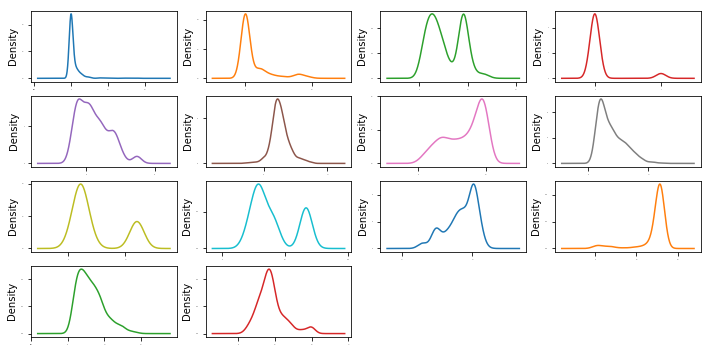

In [6]:
# densidad
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1, figsize=(12,6))
pyplot.show()

In [7]:
# validation dataset
array = dataset.values
X = array[:,0:-1]
Y = array[:,-1]
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [8]:
# test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error' # 0 is best

In [9]:
# spot check algorithms
models = []
# Linear algorithms
models.append(('LASSO', Lasso()))

In [10]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LASSO: -26.431547 (11.655308)


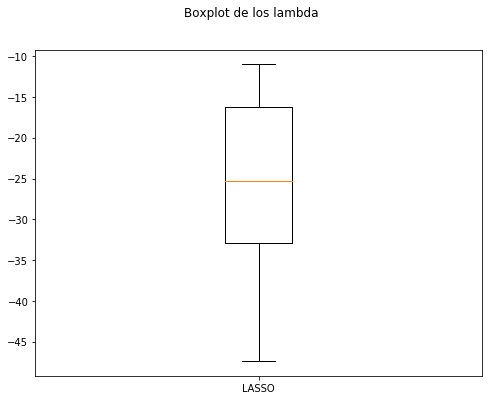

In [26]:
fig = pyplot.figure()
fig.suptitle('Boxplot de los lambda')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
pyplot.show()

In [18]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=cv_results.mean())
clf.fit(X,Y)
Lasso(alpha=cv_results.mean(), copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=seed,
   selection='cyclic', tol=0.0001)
print(clf.coef_)
print(clf.intercept_)

[-5.57872057e+00 -3.37671922e-01  3.40651459e+01  5.01538568e+02
 -9.12510414e+03 -2.01340026e+02  7.89426543e+00 -1.53318105e+02
  2.46746658e+01  6.62689509e-01 -1.08557671e+02 -5.70991523e-01
  3.90120193e+00]
7651.472629065027
